In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


print(f"{tf.__version__ = }")

tf.__version__ = '2.6.1'


In [2]:
n_gpus = len(tf.config.list_physical_devices("GPU"))
print(f"{n_gpus = }")

n_gpus = 1


## 1. Classifying movie reviews: Binary classification

In [3]:
# load pre-processed imdb

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print(f"{len(train_data[0]) = }")
print(f"{train_data[0][:10] = }")
print(f"{train_labels[0] = }")

len(train_data[0]) = 218
train_data[0][:10] = [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
train_labels[0] = 1


In [5]:
for i in range(5):
    sample_len = len(train_data[i])
    print(f"{i = }: {sample_len = }")

i = 0: sample_len = 218
i = 1: sample_len = 189
i = 2: sample_len = 141
i = 3: sample_len = 550
i = 4: sample_len = 147


In [2]:
import numpy as np
from typing import List

def multi_hot_encode(sequences: List[List], dimension: int = 10_000):
    results = np.zeros(shape=(len(sequences), dimension))

    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    
    return results


In [7]:
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

In [8]:
# also vectorize labels
y_train = np.asarray(train_labels).astype("float32") 
y_test = np.asarray(test_labels).astype("float32") 

In [29]:
# build 3 layer model
def get_model(*, n_representation_layers=3, n_units=16, intermediate_activation="relu", loss="binary_crossentropy"):
    
    # representation layers
    layer_list = n_representation_layers * [layers.Dense(n_units, activation=intermediate_activation)]

    # final layer
    layer_list.append(layers.Dense(1, activation="sigmoid"))
    
    model = keras.Sequential(layer_list)
    model.compile(
        optimizer="rmsprop",
        loss=loss,
        metrics=["accuracy"]
    )

    return model

model = get_model()

In [12]:
# create validation set

x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [13]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

2022-03-02 01:45:33.775739: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
30/30 [==============================] - 7s 35ms/step - loss: 0.5146 - accuracy: 0.7903 - val_loss: 0.4406 - val_accuracy: 0.8021
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3181 - accuracy: 0.9010 - val_loss: 0.3120 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2349 - accuracy: 0.9245 - val_loss: 0.2829 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1844 - accuracy: 0.9423 - val_loss: 0.2741 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1494 - accuracy: 0.9543 - val_loss: 0.2809 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1232 - accuracy: 0.9619 - val_loss: 0.2896 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1048 - accuracy: 0.9681 - val_loss: 0.3028 - val_accuracy: 0.8850
Epoch 8/20
30

In [16]:
# plot train and val losses
import matplotlib.pyplot as plt
def plot_history(history: keras.callbacks.History, variable_name: str):
    history_dict = history.history

    train_values = history_dict[variable_name]
    val_values = history_dict[f"val_{variable_name}"]
    epochs = range(1, len(train_values) + 1)

    plt.figure()
    plt.plot(epochs, train_values, "bo", label=f"Training {variable_name}")
    plt.plot(epochs, val_values, "b", label=f"Validation {variable_name}")
    plt.title(f"Training and validation {variable_name}")
    plt.xlabel("Epochs")
    plt.ylabel(f"{variable_name}")
    plt.legend()
    plt.show()


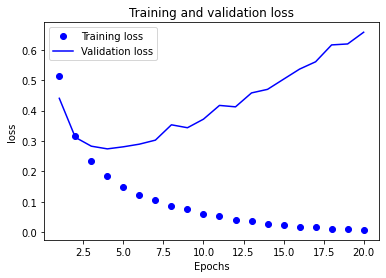

In [18]:

plot_history(history, "loss")


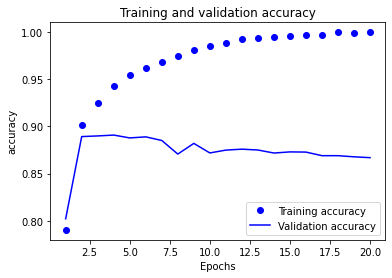

In [19]:
plot_history(history, "accuracy")

model is clearly overfitting. For now, just re-init and train on full data for just 4 epochs

In [25]:
model = get_model()
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4430 - accuracy: 0.8200
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2563 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1976 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2975 - accuracy: 0.8819


In [26]:
print(f"{results = }")

results = [0.29747629165649414, 0.881879985332489]


### Additional experiments

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1628 - accuracy: 0.7862 - val_loss: 0.1155 - val_accuracy: 0.8761
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0899 - accuracy: 0.9078 - val_loss: 0.0948 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0673 - accuracy: 0.9300 - val_loss: 0.0872 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0557 - accuracy: 0.9423 - val_loss: 0.0844 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0458 - accuracy: 0.9541 - val_loss: 0.0837 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0386 - accuracy: 0.9661 - val_loss: 0.0831 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.9684 - val_loss: 0.0858 - val_accuracy: 0.8824
Epoch 8/20
30/

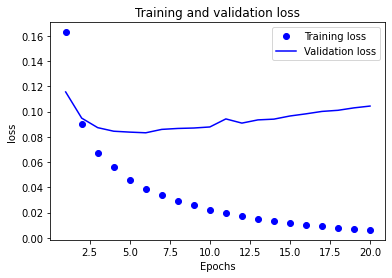

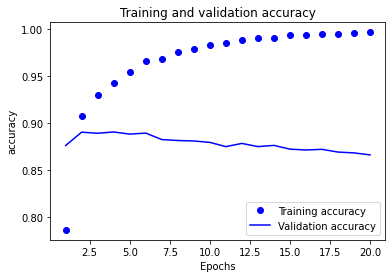

In [31]:
# mse as loss
model = get_model(loss="mse")

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

plot_history(history, 'loss')
plot_history(history, 'accuracy')

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4938 - accuracy: 0.7953 - val_loss: 0.3866 - val_accuracy: 0.8751
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3146 - accuracy: 0.9038 - val_loss: 0.3168 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2430 - accuracy: 0.9246 - val_loss: 0.2907 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1981 - accuracy: 0.9399 - val_loss: 0.2754 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1661 - accuracy: 0.9507 - val_loss: 0.2708 - val_accuracy: 0.8910
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1422 - accuracy: 0.9585 - val_loss: 0.2733 - val_accuracy: 0.8892
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1225 - accuracy: 0.9655 - val_loss: 0.2820 - val_accuracy: 0.8864
Epoch 8/20
30/3

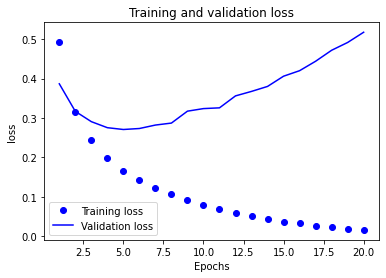

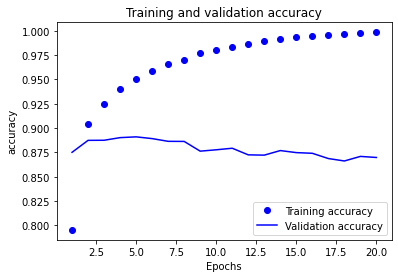

In [33]:
# tanh activation
model = get_model(intermediate_activation="tanh")

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

plot_history(history, 'loss')
plot_history(history, 'accuracy')

## 2. Classifying newswires: Multi-class classification

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [4]:
print(f"{len(train_data) = }")
print(f"{len(test_data) = }")

len(train_data) = 8982
len(test_data) = 2246


In [5]:
print(f"{train_data[10] = }")
print(f"{train_labels[10] = }")

train_data[10] = [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
train_labels[10] = 3


In [6]:
# vectorize inputs
x_train = multi_hot_encode(train_data)
x_test = multi_hot_encode(test_data)

In [7]:
y_train = multi_hot_encode(train_labels, dimension=46) # this should be equivalent to one-hot-oncoding
y_test = multi_hot_encode(test_labels, dimension=46)

In [8]:
# check that it's actually equivalent
assert (y_train.sum(axis=1) == 1.).all()
assert (y_test.sum(axis=1) == 1.).all()

In [11]:
# lets use the build-in versions of this instead
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
# very similar to previous one, just change: 
# - units last layer
# - default n_units (more capacity)
# - loss
def get_model(*, n_representation_layers=3, n_units=64, intermediate_activation="relu", loss="categorical_crossentropy"):
    
    # representation layers
    layer_list = n_representation_layers * [layers.Dense(n_units, activation=intermediate_activation)]

    # final layer
    layer_list.append(layers.Dense(46, activation="softmax"))
    
    model = keras.Sequential(layer_list)
    model.compile(
        optimizer="rmsprop",
        loss=loss,
        metrics=["accuracy"]
    )

    return model

model = get_model()

In [14]:
# validation split
x_val = x_train[:1_000]
partial_x_train = x_train[1_000:]
y_val = y_train[:1_000]
partial_y_train = y_train[1_000:]

In [15]:
# train for 20 epochs
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

2022-03-04 00:30:11.249236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
16/16 [==============================] - 5s 24ms/step - loss: 2.5884 - accuracy: 0.5535 - val_loss: 1.8567 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4932 - accuracy: 0.7196 - val_loss: 1.3697 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0749 - accuracy: 0.7886 - val_loss: 1.1444 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8359 - accuracy: 0.8348 - val_loss: 1.0233 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6695 - accuracy: 0.8686 - val_loss: 0.9399 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5466 - accuracy: 0.8933 - val_loss: 0.8865 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4521 - accuracy: 0.9077 - val_loss: 0.8575 - val_accuracy: 0.8230
Epoch 8/20
16

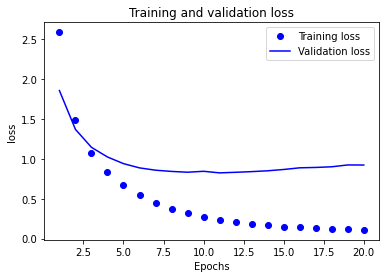

In [17]:
plot_history(history, "loss")

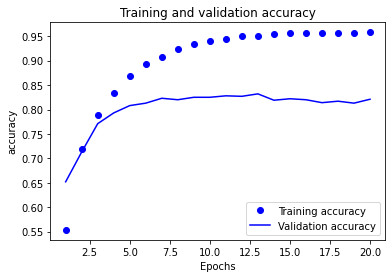

In [18]:
plot_history(history, "accuracy")

In [19]:
# starts to overfit after 9 epochs. Retrain with full data
model = get_model()
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
print(f"{results = }")

Epoch 1/9
18/18 [==============================] - 1s 8ms/step - loss: 2.4486 - accuracy: 0.5597
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3727 - accuracy: 0.7266
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9997 - accuracy: 0.7975
Epoch 4/9
18/18 [==============================] - 0s 8ms/step - loss: 0.7794 - accuracy: 0.8451
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6246 - accuracy: 0.8770
Epoch 6/9
18/18 [==============================] - 0s 8ms/step - loss: 0.5093 - accuracy: 0.9009
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.4184 - accuracy: 0.9143
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3484 - accuracy: 0.9289
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.8059
results = [0.8684013485908508, 0.8058770895004272]


In [24]:
# how does that compare to random classifier?
import copy

# this is a cool way to ensure random predictions
# with perfect distribution!
random_predictions = copy.copy(test_labels) #not really random just yet
np.random.shuffle(random_predictions) #now they are random
accuracy = 100 * (random_predictions == test_labels).mean()
print(f"{accuracy = :.3f}%")


accuracy = 17.854%


In [25]:
# we could have used a different encoding for the targets, just an integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

y_train.shape = (8982,)
y_test.shape = (2246,)


In [26]:
# we just need to change the loss
model = get_model(loss="sparse_categorical_crossentropy")
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)
print(f"{results = }")

Epoch 1/9
18/18 [==============================] - 1s 8ms/step - loss: 2.6561 - accuracy: 0.5839
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.4867 - accuracy: 0.7277
Epoch 3/9
18/18 [==============================] - 0s 8ms/step - loss: 1.0473 - accuracy: 0.7956
Epoch 4/9
18/18 [==============================] - 0s 7ms/step - loss: 0.8068 - accuracy: 0.8412
Epoch 5/9
18/18 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.8723
Epoch 6/9
18/18 [==============================] - 0s 7ms/step - loss: 0.5240 - accuracy: 0.8980
Epoch 7/9
18/18 [==============================] - 0s 7ms/step - loss: 0.4312 - accuracy: 0.9141
Epoch 8/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3599 - accuracy: 0.9283
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.8019
results = [0.8713235259056091, 0.8018699884414673]


## 3. Predicting house prices: Regression

In [28]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [29]:
print(f"{train_data.shape = }")
print(f"{train_labels.shape = }")
print(f"{test_data.shape = }")
print(f"{test_labels.shape = }")

train_data.shape = (404, 13)
train_labels.shape = (404,)
test_data.shape = (102, 13)
test_labels.shape = (102,)


In [30]:
print(f"{train_data[0] = }")
print(f"{train_labels[0] = }")

train_data[0] = array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])
train_labels[0] = 15.2


In [31]:
# normalize inputs 

# compute mean and std, apply to train
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# apply to test
test_data -= mean
test_data /= std


In [32]:
def get_model(*, n_representation_layers=2, n_units=64, intermediate_activation="relu", loss="mse"):
    
    # representation layers
    layer_list = n_representation_layers * [layers.Dense(n_units, activation=intermediate_activation)]

    # final layer
    layer_list.append(layers.Dense(1))
    
    model = keras.Sequential(layer_list)
    model.compile(
        optimizer="rmsprop",
        loss=loss,
        metrics=["mae"]
    )

    return model

model = get_model()

In [48]:
# lets use k-fold cross validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print(f"Processing fold {i}")
    val_start = i * num_val_samples
    val_end = (i + 1) * num_val_samples
    
    val_data = train_data[val_start:val_end]
    val_labels = train_labels[val_start:val_end]

    partial_train_data = np.concatenate((train_data[:val_start], train_data[val_end:]), axis=0)
    partial_train_labels = np.concatenate((train_labels[:val_start], train_labels[val_end:]), axis=0)

    model = get_model()

    history = model.fit(partial_train_data, partial_train_labels, epochs=num_epochs, batch_size=16, verbose=0, 
                        validation_data=(val_data, val_labels))
    all_mae_histories.append(history.history["val_mae"])

Processing fold 0
Processing fold 1
Processing fold 2
Processing fold 3


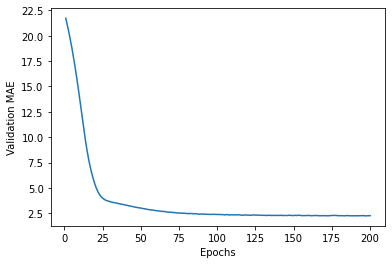

In [49]:
average_mae_history = np.stack(all_mae_histories).mean(axis=0)

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

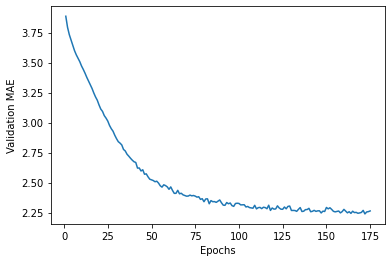

In [52]:
# zoom in 
zoom_average_mae_history = average_mae_history[25:]

plt.plot(range(1, len(zoom_average_mae_history) + 1), zoom_average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()